# Učni uspehi srednješolcev

V dveh srednjih šolah so zbirali podatke učencev. Imamo tri datoteke zbranih podatkov o učencih:
- demografski podatki učencev
- podatki o obiskani srednji šoli in prisotnosti na predavanjih matematike
- ocene matematike

### Opis spremenljivk

- school - srednja šola, ki jo učenec obiskuje (kategorično: 'GP' - Gornji Petrovci ali 'MS' - Murska Sobota)
- sex - spol učenca (kategorično: 'F' - ženski ali 'M' - moški)
- age - starost učencev (številsko: med 15 in 22 let)
- address - tip okolja prebivanja (kategorično: 'U' - urbano okolje ali 'R' - ruralno okolje)
- famsize - velikost družine (kategorično: 'LE3' - manj kot 3je člani ali 'GT3' - več kot trije člani)
- Pstatus - status staršev (kategorično: 'T' - skupno gospodinjstvo ali 'A' - ločeno gospodinjstvo)
- Medu - izobrazba matere (številsko: 0 - brez, 1 - do 4. razreda OŠ, 2 – zaključena OŠ, 3 – srednja šola or 4 – višja izobrazba)
- Fedu - izobrazba očeta (številsko: 0 - brez, 1 - do 4. razreda OŠ, 2 – zaključena OŠ, 3 – srednja šola or 4 – višja izobrazba)
- Mjob - poklic matere (kategorično: 'teacher', 'health', 'services', 'at_home' ali 'other')
- Fjob - poklic očeta (kategorično: 'teacher', 'health', 'services', 'at_home' ali 'other')
- reason - razlog za izbiro srednje šole (kategorično: bližina 'home', 'reputation', 'course' odlični kurikulum ali 'other')
- guardian - skrbnik otroka (kategorično: 'mother', 'father' ali 'other')
- traveltime - čas od doma do šole (številsko: 1 - < 15 min., 2 - 15 do 30 min., 3 - 30 min. do 1 hour, ali 4 - > 1 h)
- studytime - čas učenja tedensko (številsko: 1 - < 2 h, 2 - 2 do 5 h, 3 - 5 do 10 h, ali 4 - > 10 h)
- failures - število nenapredovanj v višje razrede (številsko: n če 1<=n<3, drugače 4)
- schoolsup - dodatne ure matematike v šoli za slabše učence (kategorično: yes ali no)
- famsup - družinska pomoč pri matematiki (kategorično: yes ali no)
- paid - izvenšolsko plačano izobraževanje matematike (kategorično: yes ali no)
- activities - izvenšolske aktivnosti (kategorično: yes ali no)
- nursery - udeležba na izobraževanj nege (kategorično: yes ali no)
- higher - želja po višješolski izobrazbi (kategorično: yes ali no)
- internet - dostop do interneta doma (kategorično: yes ali no)
- romantic - je v romantičnem razmerju (kategorično: yes ali no)
- famrel - kvaliteta odnosov v družini (številsko: od 1 - zelo slabi odnosi, do 5 - odlični odnosi)
- freetime - količina prostega časa izven šole (številsko: from 1 - zelo malo, do 5 - ogromno)
- goout - količino druženja s prijatelji (številsko: od 1 - zelo malo, do 5 - ogromno)
- Dalc - količina popitega alkohola na delovne dni (številsko: od 1 - zelo malo, do 5 - ogromno)
- Walc - količina popitega alkohola na teden (številsko: od 1 - zelo malo, do 5 - ogromno)
- health - zdravstveno stanje študenta (številsko: od 1 - zelo slabo, do 5 - odlično)
- absences - število neopravičenih izostankov (številsko: med 0 in 93)
- G1 - ocena po prvem semestru (številsko: od 0 to 20)
- G2 - ocena po drugem semestru (številsko: od 0 do 20)
- G3 - končna ocena (številsko: od 0 do 20)

In [1]:
nominalni = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
stevilski = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

### Naloga 1

Najprej preberite vse tri datoteke podatkov: `students.txt`, `students_grades.csv` in `students_school.xlsx`. Vse prebrane podatke združite v eno datoteko. Pri združevanju pazite, da učence združite po njihovem ID.

- Izpišite število stolpcev ter število vrstic združenih podatkov.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

df_csv = pd.read_csv("students_grades.csv")
df_xlsx = pd.read_excel("students_school.xlsx")
df_txt = pd.read_csv("students.txt", sep=";")

df = pd.merge(df_csv, df_xlsx, on="student_id")

df = pd.merge(df, df_txt, on="student_id")

df.shape

(395, 34)

### Naloga 2

- V tabeli padajoče izpišite povprečno število neopravičenih izostankov glede na izobrazbo matere. Izpišite le prve tri vrstice - tiste z največjim povprečnim številom zaostankov.

- Izrišite dva (v eni sliki) grafa škatel z brki za končno oceno. V enem grafu naj bo ločeno glede na tedensko dozo zaužitega alkohola, grafa pa naj se ločita glede na spol učenca.

In [3]:
df_txt.iloc[:5]

izostanki = pd.DataFrame()

izostanki['Izobrazba'] = df['Fedu']
izostanki['Izostanki'] = df['absences']

izostanki.groupby('Izobrazba', as_index=False)['Izostanki'].mean()


,Izobrazba,Izostanki
0,0,5.000000
1,1,5.048780
2,2,5.756522
3,3,6.440000
4,4,5.468750


<AxesSubplot:xlabel='Walc', ylabel='sex'>

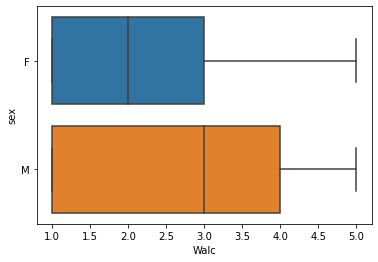

In [4]:
sns.boxplot(data=df, x='Walc', y="sex")

### Naloga 3
Podatke standardizirajte in naredite indikacijske stolpce za kategorične vrednosti.
- Izpišite število stolpcev.
- Izpišite povprečje stolpca `age`.


In [5]:
from sklearn.preprocessing import StandardScaler

skejler = StandardScaler()

stevilskiStolpci = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 
                    'goout', 'Walc', 'Dalc', 'absences', 'G1', 'G2', 'health']

kategoricni = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
               'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

df = pd.get_dummies(df, columns=nominalni)
                    
df[stevilski] = skejler.fit_transform(df[stevilski])

print(f'Število stolpcev -> {len(df.columns)}')

Število stolpcev -> 60


In [6]:
df['age'].mean()

1.3227112794648067e-15

### Naloga 4
Naredite model regresije z regresijskim naključnim gozdom (s 100 drevesi) na tak način, da razdelite množico na učno (60%) in testno z naključnim zrnom 456. Napovedujete končno oceno učencev, pri tem pa uporabite vse podatke razen vmesnih ocen obeh semestrov.
- Izpišite povprečno absolutno napako zgrajenega modela.


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

preverjanje = df['G3']
ucenje = df.drop(columns=['G1', 'G2', 'G3'])

x_train, x_test, y_train, y_test = train_test_split(ucenje, preverjanje, test_size=0.4, random_state=456)


gozd = RandomForestRegressor(n_estimators=100)

gozd.fit(x_train, y_train)

napoved = gozd.predict(x_test)

print(f'Povprečna absolutna napaka -> {mean_absolute_error(napoved, y_test)}')

Povprečna absolutna napaka -> 3.2469620253164555


### Naloga 5
Podrobneje preizkusite algoritem regresije z regresijskim drevesom. Uporabite navzkrižno validacijo s tremi rezi in preizkusite sledečo največjo globino drevesa: 2,3,5,10. Optimizirajte na kvadratno napako.
- Izpišite najboljše parametre algoritma.
- Izpišite najboljšo kvadratno napako.


In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

fold = KFold(n_splits=5, shuffle=True)

grid = {
    'max_depth': [2, 3, 5, 10]
}


gv = GridSearchCV(DecisionTreeRegressor(), param_grid=grid, cv=3, scoring='neg_mean_squared_error')

gv.fit(ucenje, preverjanje)

print(gv.best_params_)
print(gv.best_score_)

{'max_depth': 2}
-16.69793073385416
